In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("/content/column_2C_weka.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [8]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [9]:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


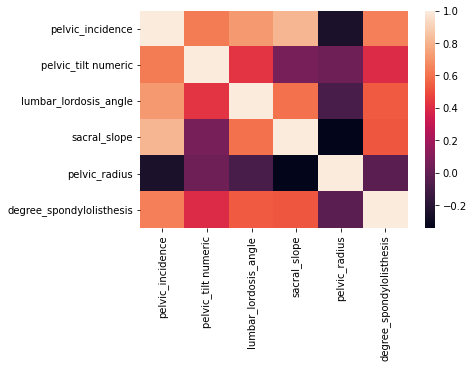

In [13]:
sns.heatmap(data.corr(), annot = True, fmt = ".2f")
plt.show()


**Simple Linear Regression**

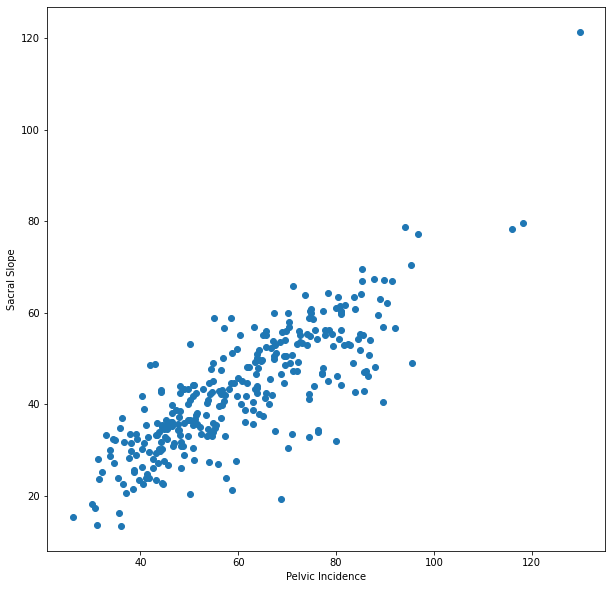

In [15]:
pelvic_incidence = np.array(data.loc[:,'pelvic_incidence']).reshape(-1,1)
sacral_slope = np.array(data.loc[:,'sacral_slope']).reshape(-1,1)
plt.figure(figsize=(10,10))
plt.scatter(pelvic_incidence,sacral_slope)
plt.xlabel("Pelvic Incidence")
plt.ylabel("Sacral Slope")
plt.show()

R^2 score:  0.6641597839724749


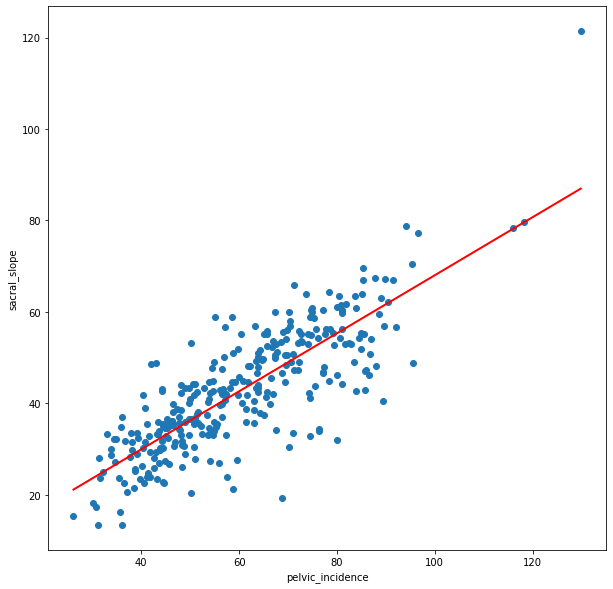

In [16]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Predict space
predict_space = np.linspace(min(pelvic_incidence), max(pelvic_incidence)).reshape(-1,1)
# Fit
reg.fit(pelvic_incidence,sacral_slope)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(pelvic_incidence, sacral_slope))
# Plot regression line and scatter
plt.figure(figsize=(10,10))
plt.plot(predict_space, predicted, color='red', linewidth=2)
plt.scatter(pelvic_incidence,sacral_slope)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


**Multiple Linear Regression**

In [18]:
x = (data.iloc[:,[0,2]]).values # [pelvic_incidence,lumbar_lordosis_angle]
y = data.sacral_slope.values.reshape(-1,1)

In [19]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)


print("b0: ",multiple_linear_regression.intercept_)
print("b1,b2:",multiple_linear_regression.coef_)

multiple_linear_regression.predict(np.array([[63.0278175 , 39.60911701],[40.47523153, 39.60911701]]))
# first values of [[pelvic_incidence,lumbar_lordosis_angle],[sacral_slope,lumbar_lordosis_angle]]

b0:  [4.45156588]
b1,b2: [[0.61874535 0.02060895]]


array([[44.26603761],
       [30.31172982]])

**Polinomial Linear Regression**

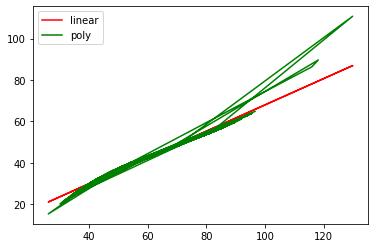

In [21]:
x = np.array(data.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data.loc[:,'sacral_slope']).reshape(-1,1)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x,y)
# predict
y_head = lr.predict(x)

plt.plot(x,y_head,color="red",label = "linear")

# polynomial regression = y = b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n

from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = PolynomialFeatures(degree = 3)

x_polynomial = polynomial_regression.fit_transform(x)
# fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y) 

# visualize

y_head2 = linear_regression2.predict(x_polynomial)


plt.plot(x,y_head2,color = "green", label = "poly")
plt.legend()
plt.show()